In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [12]:
#  uploading our dataset from a folder in the local machine
df = pd.read_csv(r'C:/Users/test/Documents/tochora/baba/car_data.csv')
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [13]:
# shape of our dataset
df.shape

(1000, 5)

our dataset has 1000 rows and 5 columns

In [14]:
# checking null values in our dataset
df.isnull().sum()

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

In [15]:
# different dtypes of coumns in our dataset
df.dtypes

User ID          int64
Gender          object
Age              int64
AnnualSalary     int64
Purchased        int64
dtype: object

In [16]:
# statistics
df.describe().style.background_gradient()

,User ID,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.106000,72689.000000,0.402000
std,288.819436,10.707073,34488.341867,0.490547
min,1.000000,18.000000,15000.000000,0.000000
25%,250.750000,32.000000,46375.000000,0.000000
50%,500.500000,40.000000,72000.000000,0.000000
75%,750.250000,48.000000,90000.000000,1.000000
max,1000.000000,63.000000,152500.000000,1.000000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 720x720 with 0 Axes>

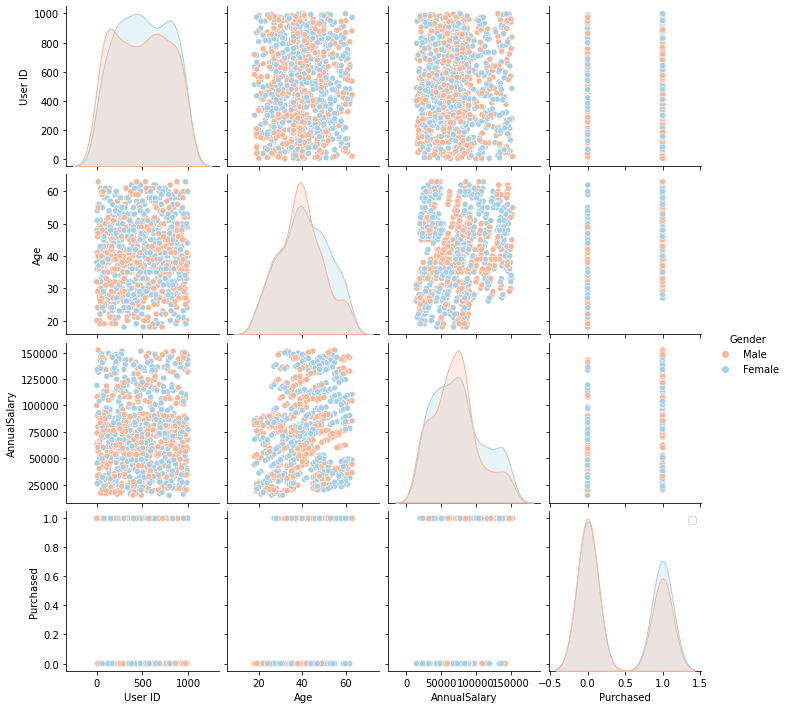

In [17]:
# A pairplot to show relationship of variables in our model
plt.figure(figsize=(10, 10))
sns.pairplot(df, palette='RdBu',hue='Gender')
plt.legend()
plt.show()

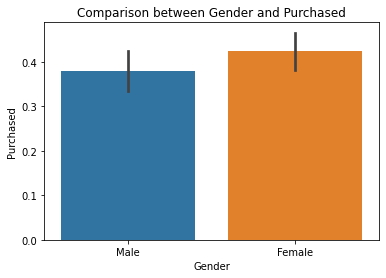

In [18]:
sns.barplot(x='Gender', y='Purchased', data=df)
plt.title('Comparison between Gender and Purchased')
plt.show()

the above bargraph shows that females bought more cars compared to males.

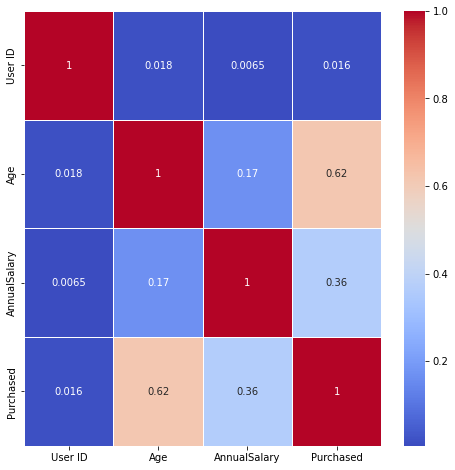

In [19]:
# a heatmap to show correllation between columns in our dataset
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

correlation measures the linear relationship between variables in a dataset ranging from -1 to 1 where -1 shows a perfect negative linear relationship while 1 shows a positive perfect relationship.
Age and purchased have a correlation of 0.62 which is a fair positive correlation.This means that when age increases, purchases increase almost at the same rate.
Annual salary and age have a  correlation of 0.17 which is a weak positive correlation. This means that annul salary of a person will increases at a lower rate if age increase.


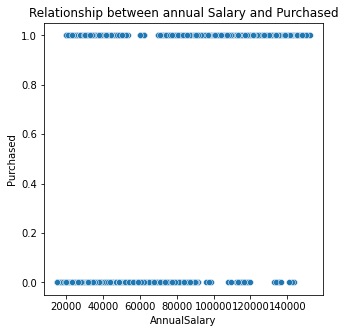

In [20]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x=df['AnnualSalary'], y=df['Purchased'], palette='autumn')
plt.title('Relationship between annual Salary and Purchased')
plt.show()

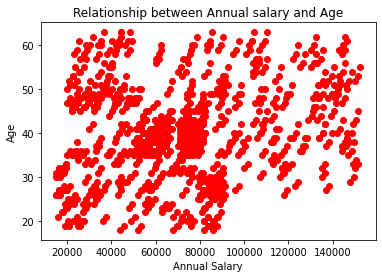

In [21]:
plt.scatter(x='AnnualSalary', y='Age', data=df,color='red')
plt.title('Relationship between Annual salary and Age')
plt.xlabel('Annual Salary')
plt.ylabel('Age')
plt.show()

There is no linear relationship between Annual salary and age.

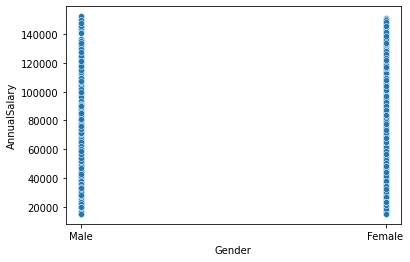

In [22]:
sns.scatterplot(x=df['Gender'], y=df['AnnualSalary'])
plt.show()

In [23]:
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [24]:

df = pd.get_dummies(df, drop_first=True)
df.head()

,User ID,Age,AnnualSalary,Purchased,Gender_Male
0,385,35,20000,0,1
1,681,40,43500,0,1
2,353,49,74000,0,1
3,895,40,107500,1,1
4,661,25,79000,0,1


Coming up with dummy variables so as to represent qualitative data in our dataset.This quantintifies them making them compatible with our model.

In [25]:
# define the predictor variables
x= df.drop(['Purchased'], axis=1)
y = df['Purchased']

segmenting variables in our dataset so as to get variables for training and testing data.

In [26]:
# splitting data into test and train data 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=10)
# standardization of our model 
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler ()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [27]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
accuracy = lr.score(x_test, y_test)
print(accuracy)

0.43772156304598464


linear regression gives an accuracy of 44%  which is very low thus it would be prudent to try another model.

In [28]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
accuracy = lr.score(x_test, y_test)
print(accuracy)

0.8425


logistic regression gives us an accuracy of 84%.

In [29]:
# naive bayes model
from sklearn.naive_bayes import GaussianNB
Gn = GaussianNB()
Gn.fit(x_train, y_train)
acc = Gn.score(x_test, y_test)
print(acc)
pred = Gn.predict(x_test)

0.885


Our model gives us a score of 89% thus we will use it.

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error, r2_score
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       248
           1       0.84      0.86      0.85       152

    accuracy                           0.89       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.89      0.89      0.89       400



Precision: Out of all cars  the model predicted would be purchased only 91% of them were purchased.
Recall : Out of all cars that were purchased , the model only predicted accurately 90% of the cars.
fi-score: Since it very close to 1.The model did a fairly good job to predict whether cars were purchased.


In [31]:
print(confusion_matrix(pred, y_test))

[[224  24]
 [ 22 130]]


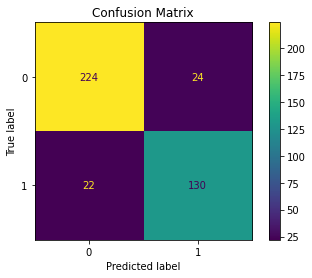

In [32]:
cm = confusion_matrix(pred, y_test, labels=Gn.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Gn.classes_)
display.plot()
plt.title('Confusion Matrix')
plt.show()